# Extracción de características de New York

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import funpymodeling.exploratory as fp

In [2]:
df = pd.read_csv('listings - CDMX_clean.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,id,host_id,beds,bedrooms,source,name,description,neighborhood_overview,host_name,host_since,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44616,196253,1.0,5.0,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,No neighborhood_overview,Fernando,2010-08-09,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
1,67703,334451,2.0,2.0,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No neighborhood_overview,Nicholas,2011-01-04,...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
2,70644,212109,1.0,1.0,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
3,107078,540705,1.0,1.0,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
4,131610,647454,1.0,2.0,previous scrape,MARIA DEL ALMA,No description,No neighborhood_overview,Fernando,2011-05-31,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.80,1.17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26581 entries, 0 to 26580
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26581 non-null  int64  
 1   host_id                      26581 non-null  int64  
 2   beds                         26581 non-null  float64
 3   bedrooms                     26581 non-null  float64
 4   source                       26581 non-null  object 
 5   name                         26581 non-null  object 
 6   description                  26581 non-null  object 
 7   neighborhood_overview        26581 non-null  object 
 8   host_name                    26581 non-null  object 
 9   host_since                   26581 non-null  object 
 10  host_location                26581 non-null  object 
 11  host_about                   26581 non-null  object 
 12  host_response_time           26581 non-null  object 
 13  host_response_ra

In [4]:
# Dado que haremos un análisis univariado de variables categóricas, delimitaremos el número de categorías a analizar
# Escogeremos 12 categóricas ya que no hay más variables categóricas en el dataset
df = df[["source", "host_response_time", "host_is_superhost", "host_verifications", "host_identity_verified", 
         "neighbourhood_cleansed", "property_type", "room_type", "bathrooms_text", "has_availability",
         "instant_bookable", "host_location"]]

In [5]:
# Hacemos el análisis univariado
fp.freq_tbl(df)

            source  frequency  percentage  cumulative_perc
0      city scrape      23670    0.890486         0.890486
1  previous scrape       2911    0.109514         1.000000

----------------------------------------------------------------

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      18792    0.706971         0.706971
1             No data       3622    0.136263         0.843234
2  within a few hours       1957    0.073624         0.916858
3  a few days or more       1107    0.041646         0.958504
4        within a day       1103    0.041496         1.000000

----------------------------------------------------------------

  host_is_superhost  frequency  percentage  cumulative_perc
0                 f      16854    0.634062         0.634062
1                 t       9727    0.365938         1.000000

----------------------------------------------------------------

                 host_verifications  frequency  percentage  cumulative

## Análisis univariado

In [6]:
# Hacemos el análisis univariado de la variable "source"
source = fp.freq_tbl(df["source"])
# Por practicidad, quitaremos las columnas "percent" y "cumulative_percent"
source.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
source

,source,frequency
0,city scrape,23670
1,previous scrape,2911


In [7]:
# Ajustamos el índice
source = source.set_index("source")
source

,frequency
source,
city scrape,23670
previous scrape,2911


Text(0, 0.5, '')

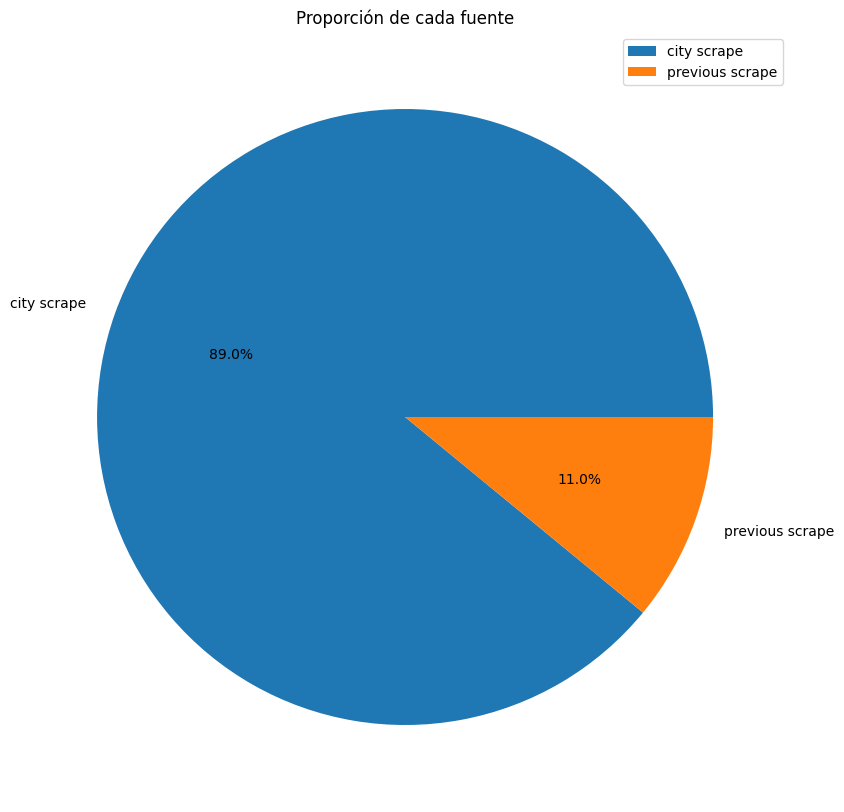

In [8]:
# Realizamos un gráfico de pastel para representar la proporción de cada fuente
source.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada fuente")
plt.ylabel("")

In [9]:
# Haremos el análisis univariado de la variable "host_response_time"
host_response_time = fp.freq_tbl(df["host_response_time"])
host_response_time.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_response_time

,host_response_time,frequency
0,within an hour,18792
1,No data,3622
2,within a few hours,1957
3,a few days or more,1107
4,within a day,1103


In [10]:
# Ajustamos el índice
host_response_time = host_response_time.set_index("host_response_time")
# Quitaremo el no data ya que no aporta información
host_response_time = host_response_time.drop("No data")
host_response_time

,frequency
host_response_time,
within an hour,18792
within a few hours,1957
a few days or more,1107
within a day,1103


Text(0, 0.5, 'Frecuencia')

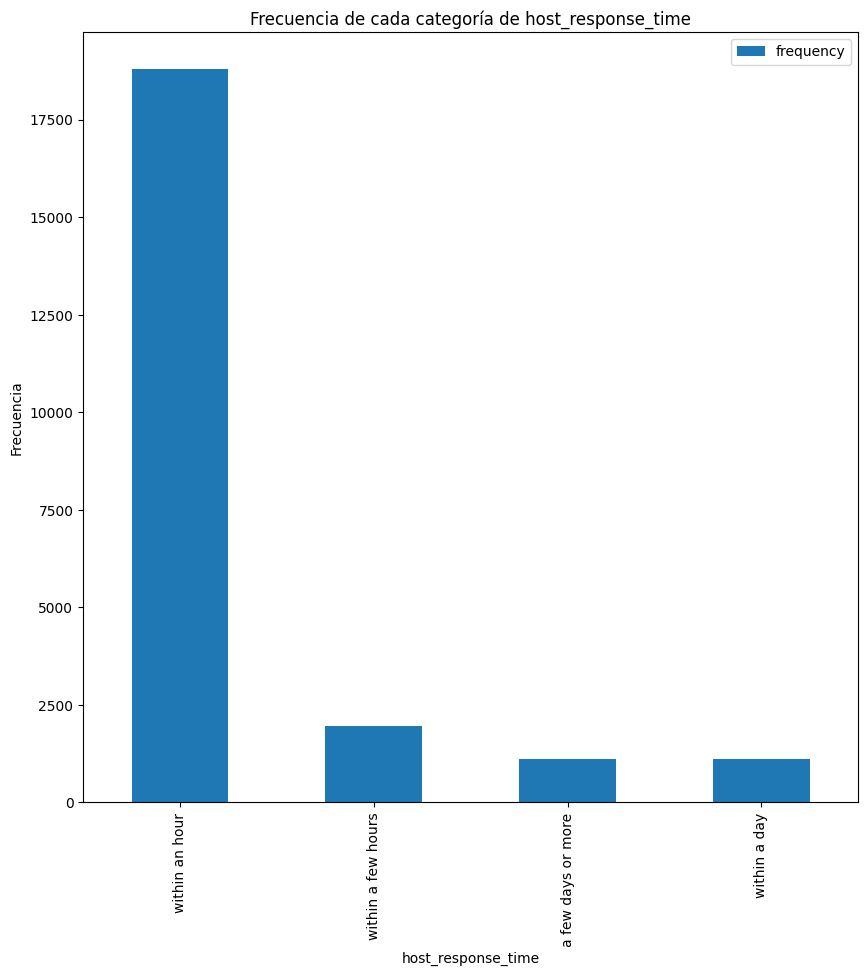

In [11]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_response_time.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_response_time")
plt.ylabel("Frecuencia")

In [12]:
# Haremos el análisis univariado de la variable "host_is_superhost"
host_is_superhost = fp.freq_tbl(df["host_is_superhost"])
host_is_superhost.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_is_superhost

,host_is_superhost,frequency
0,f,16854
1,t,9727


In [13]:
# Ajustamos el índice
host_is_superhost = host_is_superhost.set_index("host_is_superhost")
host_is_superhost

,frequency
host_is_superhost,
f,16854
t,9727


Text(0, 0.5, '')

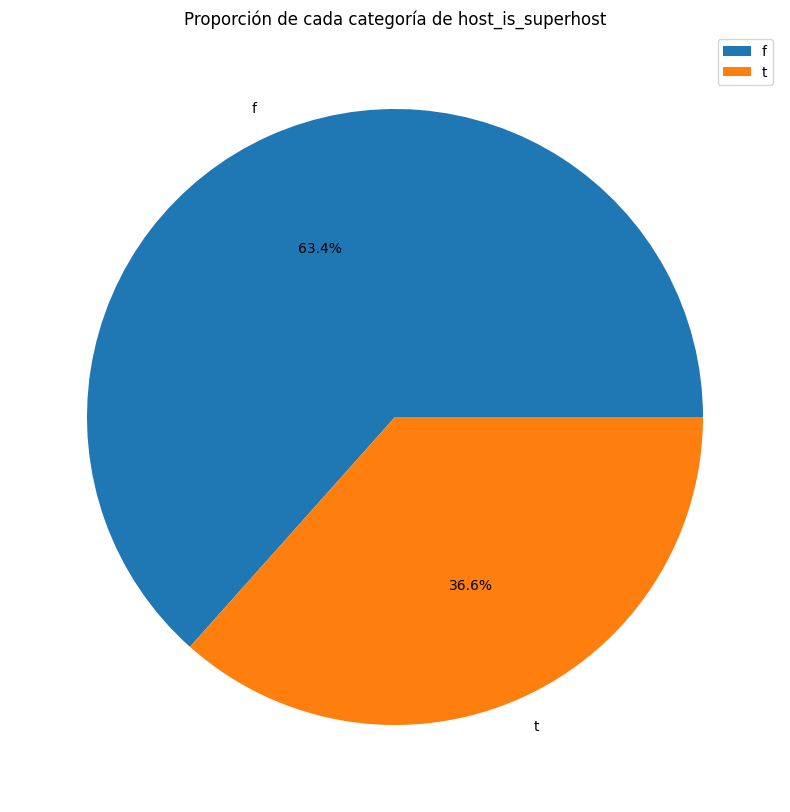

In [14]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_is_superhost.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_is_superhost")
plt.ylabel("")

In [15]:
# Haremos el análisis univariado de la variable "host_identity_verified"
host_identity_verified = fp.freq_tbl(df["host_identity_verified"])
host_identity_verified.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_identity_verified

,host_identity_verified,frequency
0,t,25425
1,f,1156


In [16]:
# Ajustamos el índice
host_identity_verified = host_identity_verified.set_index("host_identity_verified")
host_identity_verified

,frequency
host_identity_verified,
t,25425
f,1156


Text(0, 0.5, '')

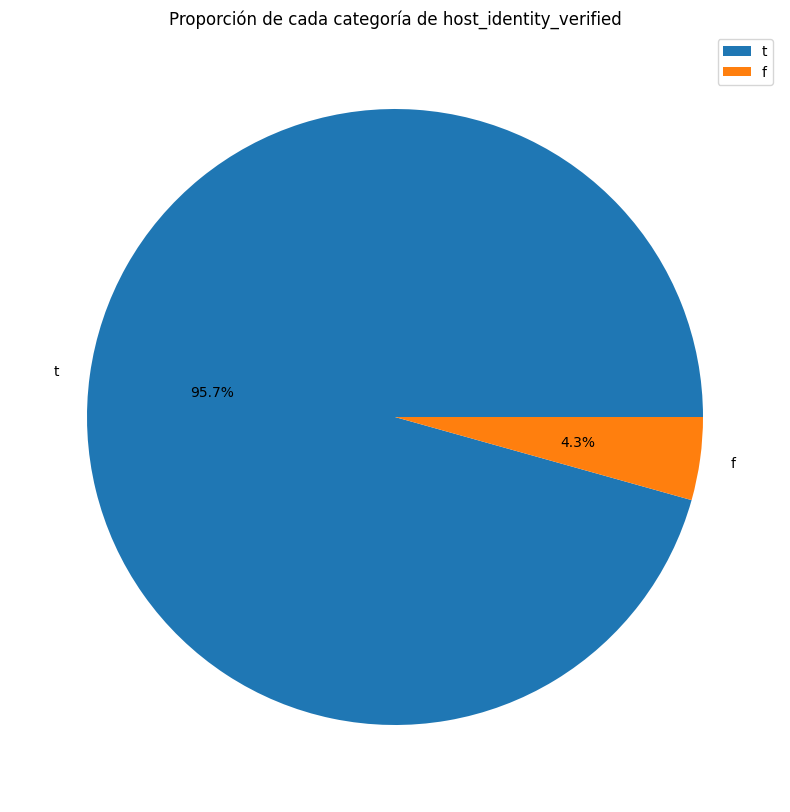

In [17]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_identity_verified.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_identity_verified")
plt.ylabel("")

In [18]:
# Haremos el análisis univariado de la variable "neighbourhood_cleansed"
neighbourhood_cleansed = fp.freq_tbl(df["neighbourhood_cleansed"])
neighbourhood_cleansed.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
neighbourhood_cleansed

,neighbourhood_cleansed,frequency
0,Cuauhtémoc,12231
1,Miguel Hidalgo,4533
2,Benito Juárez,3152
3,Coyoacán,1719
4,Álvaro Obregón,1075
5,Tlalpan,812
6,Venustiano Carranza,734
7,Gustavo A. Madero,506
8,Cuajimalpa de Morelos,441
9,Iztacalco,399


In [19]:
# Ajustamos el índice
neighbourhood_cleansed = neighbourhood_cleansed.set_index("neighbourhood_cleansed")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
neighbourhood_cleansed = neighbourhood_cleansed.head(5)
neighbourhood_cleansed

,frequency
neighbourhood_cleansed,
Cuauhtémoc,12231
Miguel Hidalgo,4533
Benito Juárez,3152
Coyoacán,1719
Álvaro Obregón,1075


Text(0, 0.5, 'Frecuencia')

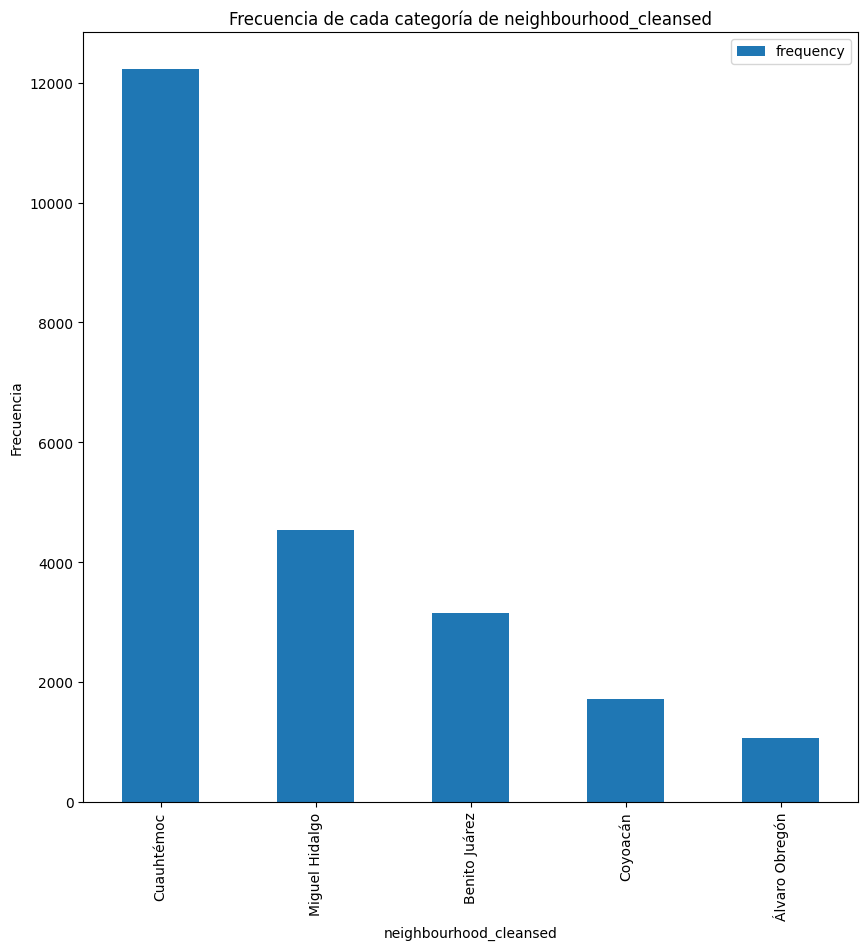

In [20]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
neighbourhood_cleansed.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de neighbourhood_cleansed")
plt.ylabel("Frecuencia")

In [21]:
# Haremos el análisis univariado de la variable "property_type"
property_type = fp.freq_tbl(df["property_type"])
property_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
property_type

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515
...,...,...
87,Private room in floor,1
88,Earthen home,1
89,Entire in-law,1
90,Shared room in dorm,1


In [22]:
# Ajustamos el índice
property_type = property_type.set_index("property_type")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
property_type = property_type.head(5)
property_type

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515


Text(0, 0.5, 'Frecuencia')

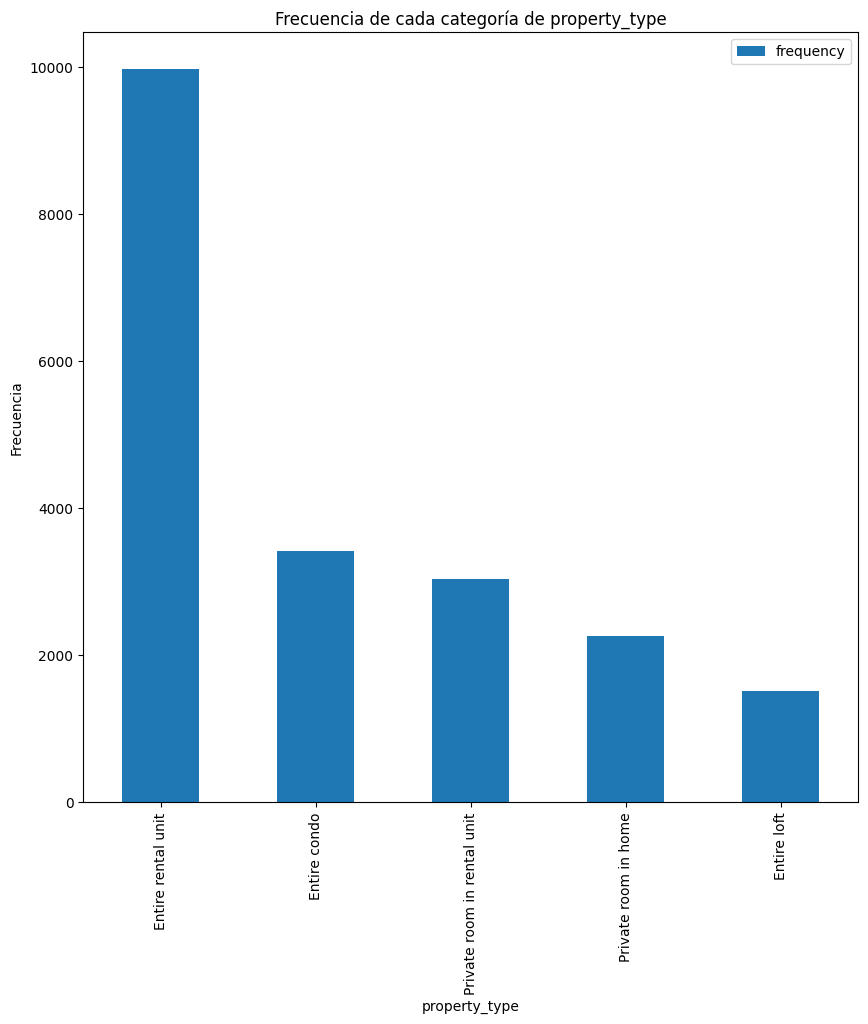

In [23]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
property_type.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de property_type")
plt.ylabel("Frecuencia")

In [24]:
# Haremos el análisis univariado de la variable "room_type"
room_type = fp.freq_tbl(df["room_type"])
room_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
room_type

,room_type,frequency
0,Entire home/apt,17362
1,Private room,8693
2,Shared room,401
3,Hotel room,125


Text(0, 0.5, '')

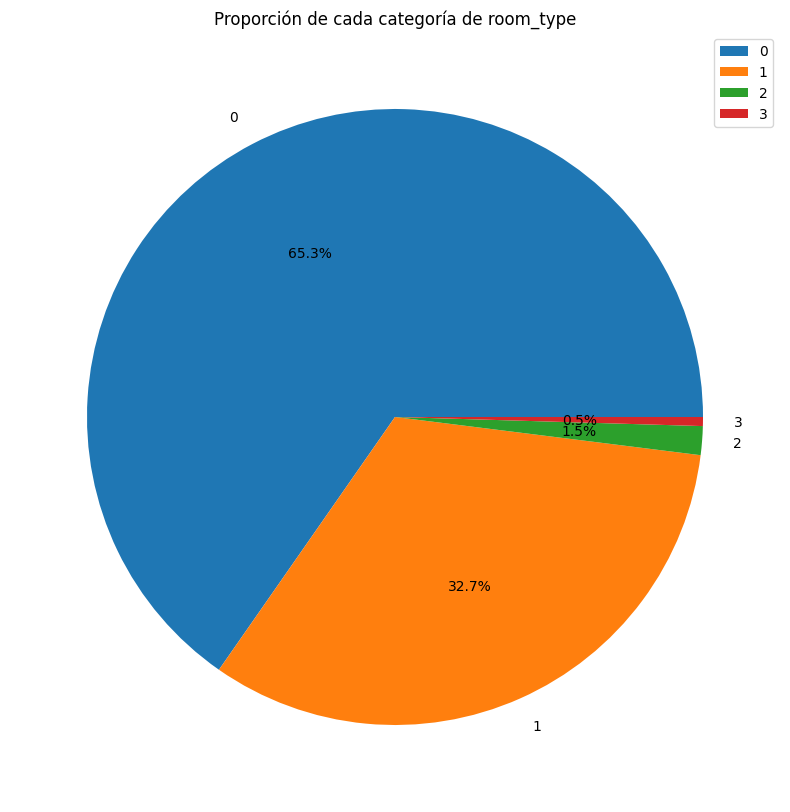

In [25]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
room_type.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de room_type")
plt.ylabel("")

In [26]:
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath               11326
2 baths               4606
1 private bath        3144
1 shared bath         2482
1.5 baths             1432
2.5 baths              854
3 baths                546
1.5 shared baths       459
2 shared baths         320
3.5 baths              250
4 baths                186
2.5 shared baths       121
3 shared baths         105
4.5 baths              102
4 shared baths          68
0 baths                 54
5 shared baths          54
5 baths                 51
0 shared baths          45
6 baths                 44
Half-bath               41
5.5 baths               38
3.5 shared baths        33
7 baths                 25
Shared half-bath        21
4.5 shared baths        20
6 shared baths          19
8 baths                 18
11.5 baths              17
6.5 baths               14
8 shared baths          12
Private half-bath       10
7.5 baths               10
9 baths                  8
8.5 baths                7
10 baths                 5
11 baths     

In [27]:
# Haremos el análisis univariado de la variable "bathrooms_text"
bathrooms_text = fp.freq_tbl(df["bathrooms_text"])
# Eliminaremos el primer número y solo dejaremos la categoría (por ejemplo, "1.0 baths" -> "baths")
# Ignoraremos los errores por problemas de formato
bathrooms_text["bathrooms_text"] = bathrooms_text["bathrooms_text"].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else x)
bathrooms_text = fp.freq_tbl(bathrooms_text["bathrooms_text"])
bathrooms_text.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
bathrooms_text

,bathrooms_text,frequency
0,baths,36
1,shared,17
2,half-bath,2
3,bath,1
4,private,1
5,Half-bath,1


In [28]:
# Ajustamos el índice
bathrooms_text = bathrooms_text.set_index("bathrooms_text")
# Quitamos los valores de un único valor
bathrooms_text = bathrooms_text[bathrooms_text["frequency"] > 1]
bathrooms_text

,frequency
bathrooms_text,
baths,36
shared,17
half-bath,2


Text(0, 0.5, '')

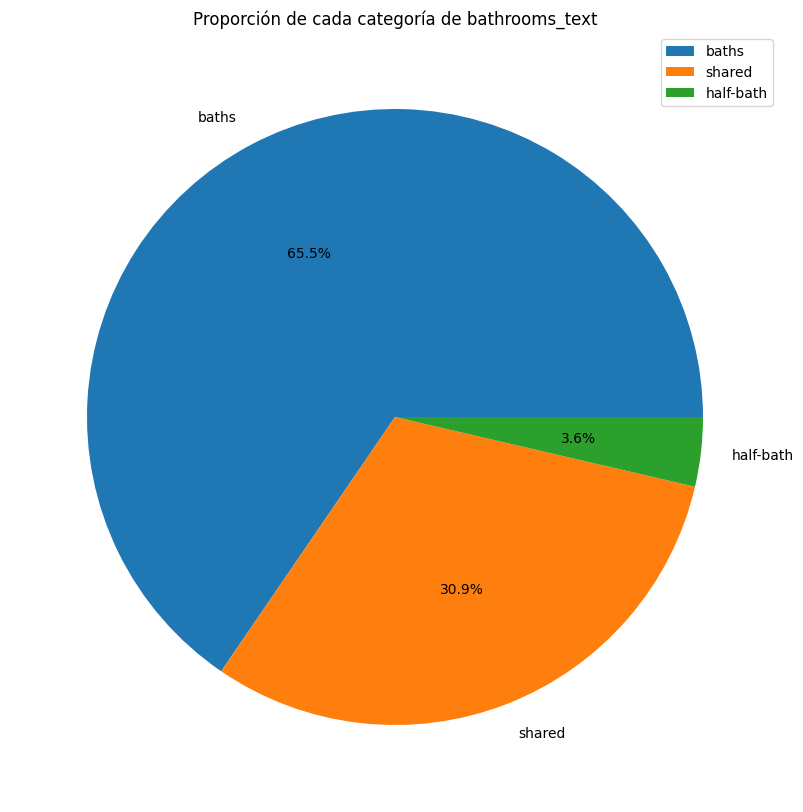

In [29]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
bathrooms_text.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de bathrooms_text")
plt.ylabel("")

In [30]:
# Haremos el análisis univariado de la variable "has_availability"
has_availability = fp.freq_tbl(df["has_availability"])
has_availability.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
has_availability

,has_availability,frequency
0,t,25532
1,f,1049


In [31]:
# Ajustamos el índice
has_availability = has_availability.set_index("has_availability")
has_availability

,frequency
has_availability,
t,25532
f,1049


Text(0, 0.5, '')

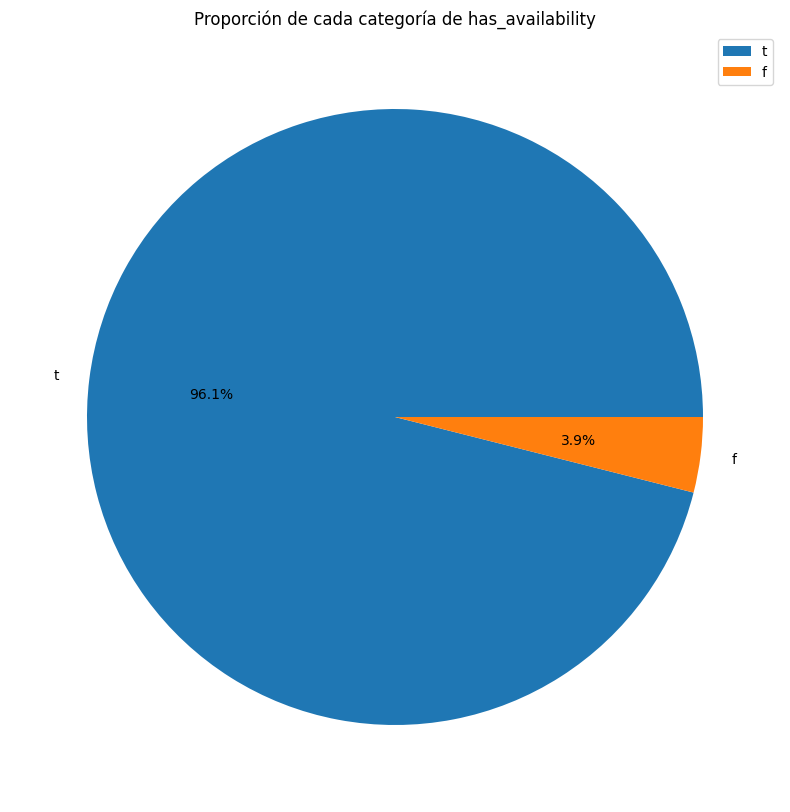

In [32]:
# Hacemos un gráfico de pastel para representar la proporción de cada categoría
has_availability.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de has_availability")
plt.ylabel("")

In [33]:
# Haremos el análisis univariado de la variable "instant_bookable"
instant_bookable = fp.freq_tbl(df["instant_bookable"])
instant_bookable.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
instant_bookable

,instant_bookable,frequency
0,f,16079
1,t,10502


In [34]:
# Ajustamos el índice
instant_bookable = instant_bookable.set_index("instant_bookable")
instant_bookable

,frequency
instant_bookable,
f,16079
t,10502


Text(0, 0.5, '')

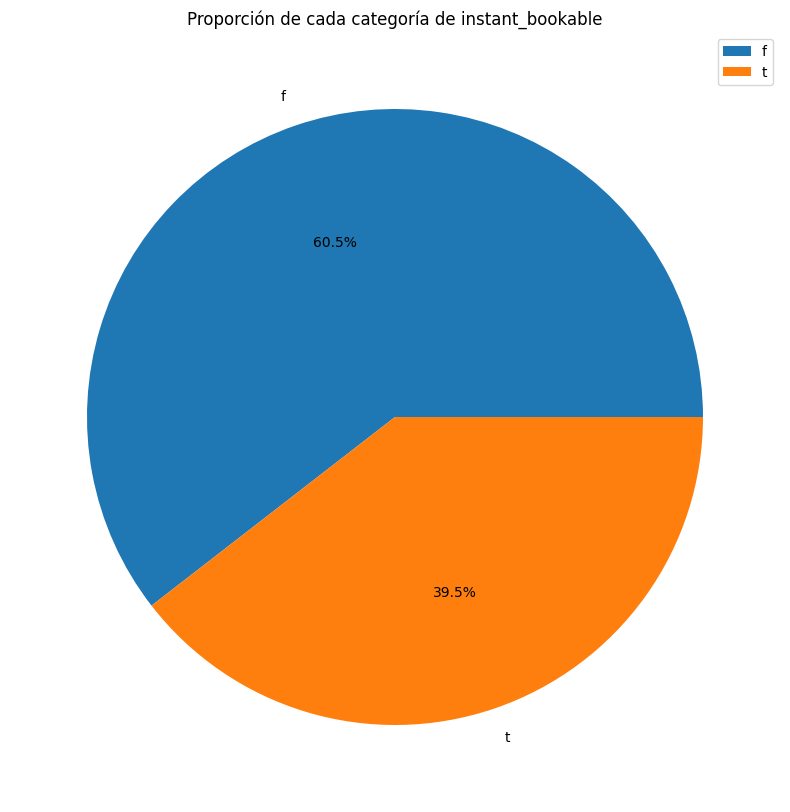

In [35]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
instant_bookable.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de instant_bookable")
plt.ylabel("")

In [36]:
# Haremos el análisis univariado de la variable "host_location"
host_location = fp.freq_tbl(df["host_location"])
host_location.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_location

,host_location,frequency
0,"Mexico City, Mexico",17197
1,No host_location,5441
2,Mexico,949
3,"Ciudad de México, Mexico",383
4,"Federal District, Mexico",213
...,...,...
396,"Merion Station, PA",1
397,"Colima, Mexico",1
398,Singapore,1
399,"Mahahual, Mexico",1


In [37]:
# Ajustamos el índice
host_location = host_location.set_index("host_location")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
host_location = host_location.head(5)
host_location

,frequency
host_location,
"Mexico City, Mexico",17197
No host_location,5441
Mexico,949
"Ciudad de México, Mexico",383
"Federal District, Mexico",213


Text(0, 0.5, 'Frecuencia')

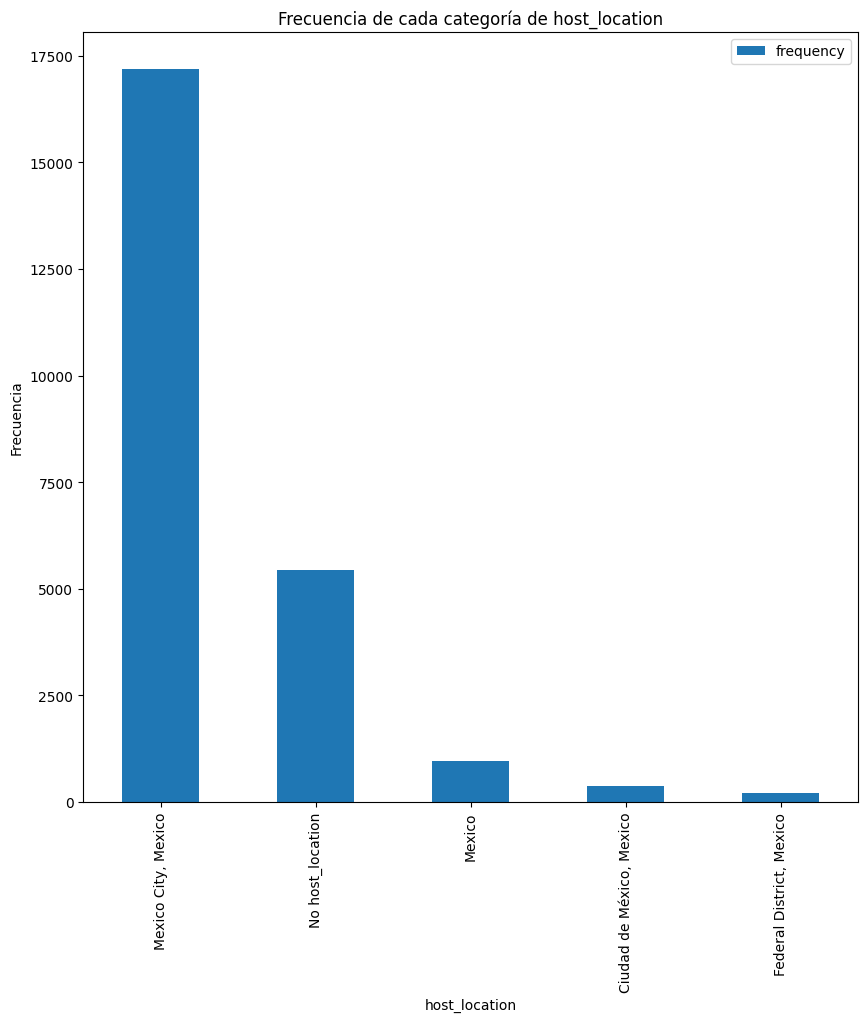

In [38]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_location.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_location")
plt.ylabel("Frecuencia")

In [39]:
# Haremos un análisis univariado de la variable "host_verifications"
host_verifications = fp.freq_tbl(df["host_verifications"])
host_verifications.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_verifications

,host_verifications,frequency
0,"['email', 'phone']",20504
1,"['email', 'phone', 'work_email']",3380
2,['phone'],2527
3,"['phone', 'work_email']",105
4,['email'],33
5,[],30
6,"['email', 'work_email']",1
7,['work_email'],1


In [40]:
# Ajustamos el índice
host_verifications = host_verifications.set_index("host_verifications")
host_verifications

,frequency
host_verifications,
"['email', 'phone']",20504
"['email', 'phone', 'work_email']",3380
['phone'],2527
"['phone', 'work_email']",105
['email'],33
[],30
"['email', 'work_email']",1
['work_email'],1


Text(0, 0.5, 'Frecuencia')

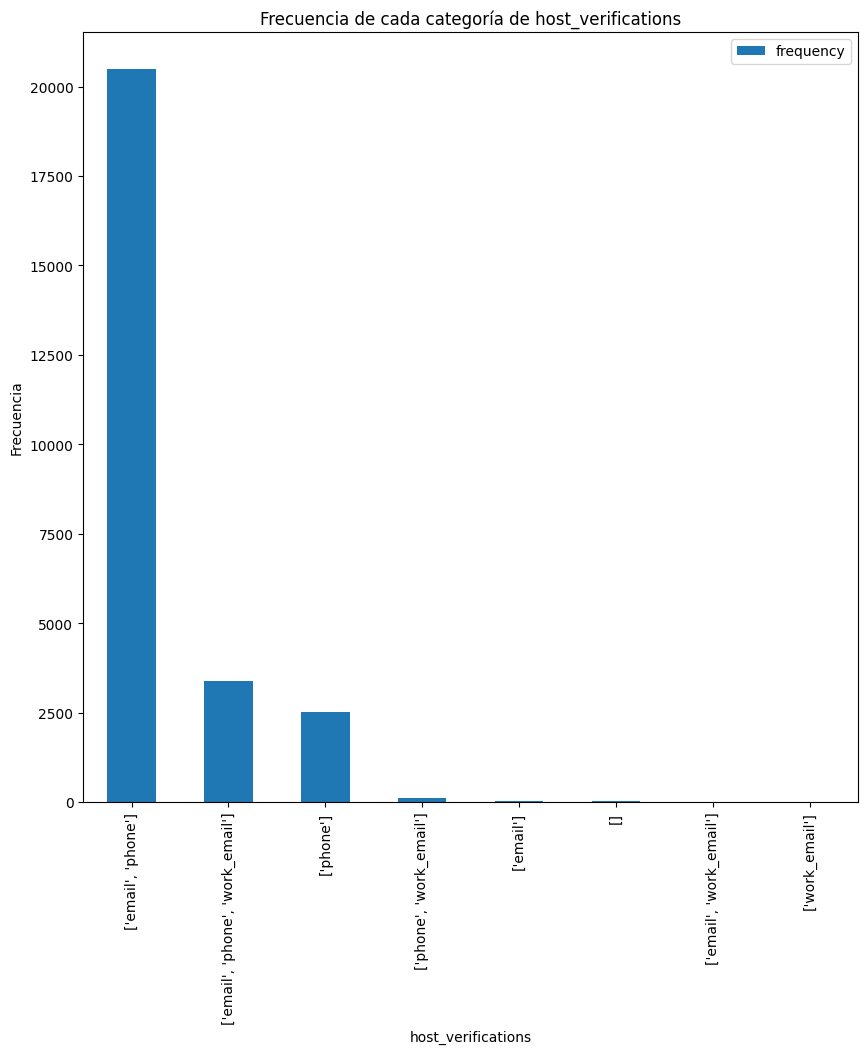

In [41]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_verifications.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_verifications")
plt.ylabel("Frecuencia")

## Categorización de variables

In [42]:
# Volvemos a cargar el dataset original
df2 = pd.read_csv('listings - New York_clean.csv')
df2.isnull().sum().sum()

0

In [43]:
# Vamos a categorizar la variable "host_response_rate"
# Para ello, cambiamos los valores a numéricos y consideramos los No data como 0
df2["host_response_rate"] = df2["host_response_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_response_rate"] = pd.to_numeric(df2["host_response_rate"], errors='coerce')
df2["host_response_rate"] = df2["host_response_rate"].fillna(0)

In [44]:
# Vamos a categorizar la variable "host_response_rate"

# Primero, determinaremos la cantidad de clases a crear
# Calculamos el numero total de la poblacion "n"
n = df2["host_response_rate"].count()
# Obtenemos el limite inferior y superior del intervalo de clase
Max=df2["host_response_rate"].max()
Min=df2["host_response_rate"].min()
Limites = [Min, Max]
# Calculamos el rango r
R = Max - Min
# Calculamos el número de intervalos de clase "ni", aplocando la regla de Sturges
ni = 1+3.32*np.log10(n)
# Calculamos el ancho del intervalo "i"
i = R/ni

#Imprimimos los resultados
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  6.177557250771356


In [45]:
# Ahora, vamos a realizar las categorías

intervalos = np.linspace(Min, Max, int(ni + 1))
# Creamos tantas categorías como clases
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
# Finalmente creamos las categorias en la columna numerica
df2["host_response_rate"] = pd.cut(df2["host_response_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_response_rate"]

0        Clase 15
1        Clase 16
2         Clase 5
3        Clase 16
4         Clase 1
           ...   
37543    Clase 16
37544    Clase 16
37545     Clase 1
37546     Clase 1
37547    Clase 16
Name: host_response_rate, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [46]:
# Realizaremos el mismo procedimiento para la variable "host_acceptance_rate"
# Primero, lo pasamos a numérico
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].apply(lambda x: x[:-1] if type(x) == str else x)
df2["host_acceptance_rate"] = pd.to_numeric(df2["host_acceptance_rate"], errors='coerce')
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].fillna(0)

In [47]:
# Determinamos la cantidad de clases a crear
n = df2["host_acceptance_rate"].count()
Max=df2["host_acceptance_rate"].max()
Min=df2["host_acceptance_rate"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  6.177557250771356


In [48]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_acceptance_rate"] = pd.cut(df2["host_acceptance_rate"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_acceptance_rate"]

0         Clase 4
1        Clase 16
2         Clase 6
3        Clase 16
4         Clase 1
           ...   
37543     Clase 4
37544    Clase 16
37545     Clase 1
37546     Clase 1
37547    Clase 16
Name: host_acceptance_rate, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [49]:
# Seguimos con host_total_listings_count, este ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["host_total_listings_count"].count()
Max=df2["host_total_listings_count"].max()
Min=df2["host_total_listings_count"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  2.0385938927545473


In [50]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["host_total_listings_count"] = pd.cut(df2["host_total_listings_count"], bins=intervalos, labels=categorias, include_lowest=True)
df2["host_total_listings_count"]

0         Clase 5
1         Clase 1
2         Clase 1
3         Clase 3
4         Clase 1
           ...   
37543     Clase 3
37544     Clase 1
37545     Clase 3
37546     Clase 1
37547    Clase 16
Name: host_total_listings_count, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [51]:
# Seguimos con accommodates, este ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["accommodates"].count()
Max=df2["accommodates"].max()
Min=df2["accommodates"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.37065343504628134


In [52]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["accommodates"] = pd.cut(df2["accommodates"], bins=intervalos, labels=categorias, include_lowest=True)
df2["accommodates"]

0         Clase 1
1         Clase 6
2         Clase 1
3         Clase 1
4         Clase 3
           ...   
37543     Clase 1
37544    Clase 14
37545     Clase 3
37546     Clase 6
37547     Clase 1
Name: accommodates, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [53]:
# Seguimos con bathrooms_text, este requiere un preprocesamiento para convertirlo a numérico
# Simplemente nos quedaremos con el valor numérico, quitando el resto
df2["bathrooms_text"] = df2["bathrooms_text"].apply(lambda x: x.split(" ")[0] if type(x) == str else x)
df2["bathrooms_text"] = pd.to_numeric(df2["bathrooms_text"], errors='coerce')
df2["bathrooms_text"] = df2["bathrooms_text"].fillna(0)
df2["bathrooms_text"].isnull().sum()

0

In [54]:
# Determinamos la cantidad de clases a crear
n = df2["bathrooms_text"].count()
Max=df2["bathrooms_text"].max()
Min=df2["bathrooms_text"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.9575213738695602


In [55]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["bathrooms_text"] = pd.cut(df2["bathrooms_text"], bins=intervalos, labels=categorias, include_lowest=True)
df2["bathrooms_text"]

0        Clase 2
1        Clase 2
2        Clase 2
3        Clase 2
4        Clase 2
          ...   
37543    Clase 2
37544    Clase 3
37545    Clase 2
37546    Clase 2
37547    Clase 2
Name: bathrooms_text, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [56]:
# Seguimos con beds, este ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["beds"].count()
Max=df2["beds"].max()
Min=df2["beds"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  2.594574045323969


In [57]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["beds"] = pd.cut(df2["beds"], bins=intervalos, labels=categorias, include_lowest=True)
df2["beds"]

0        Clase 1
1        Clase 1
2        Clase 1
3        Clase 1
4        Clase 1
          ...   
37543    Clase 1
37544    Clase 2
37545    Clase 1
37546    Clase 1
37547    Clase 1
Name: beds, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [58]:
# Continuamos con price, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["price"].count()
Max=df2["price"].max()
Min=df2["price"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  27.088588544632394


In [59]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["price"] = pd.cut(df2["price"], bins=intervalos, labels=categorias, include_lowest=True)
df2["price"]

0        Clase 9
1        Clase 3
2        Clase 3
3        Clase 3
4        Clase 5
          ...   
37543    Clase 1
37544    Clase 6
37545    Clase 6
37546    Clase 9
37547    Clase 2
Name: price, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [60]:
# Seguimos con number_of_reviews_ltm, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["number_of_reviews_ltm"].count()
Max=df2["number_of_reviews_ltm"].max()
Min=df2["number_of_reviews_ltm"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.1235511450154271


In [61]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews_ltm"] = pd.cut(df2["number_of_reviews_ltm"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews_ltm"]

0        Clase 1
1        Clase 3
2        Clase 1
3        Clase 3
4        Clase 1
          ...   
37543    Clase 1
37544    Clase 1
37545    Clase 1
37546    Clase 1
37547    Clase 1
Name: number_of_reviews_ltm, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [62]:
# Proseguimos con availability_365, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["availability_365"].count()
Max=df2["availability_365"].max()
Min=df2["availability_365"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  22.54808396531545


In [63]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["availability_365"] = pd.cut(df2["availability_365"], bins=intervalos, labels=categorias, include_lowest=True)
df2["availability_365"]

0        Clase 16
1         Clase 9
2         Clase 4
3        Clase 13
4         Clase 1
           ...   
37543    Clase 15
37544     Clase 2
37545     Clase 6
37546    Clase 16
37547    Clase 16
Name: availability_365, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [64]:
# Proseguimos con number_of_reviews, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["number_of_reviews"].count()
Max=df2["number_of_reviews"].max()
Min=df2["number_of_reviews"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  3.3976564879242455


In [65]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["number_of_reviews"] = pd.cut(df2["number_of_reviews"], bins=intervalos, labels=categorias, include_lowest=True)
df2["number_of_reviews"]

0        Clase 15
1         Clase 3
2         Clase 1
3         Clase 3
4         Clase 4
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: number_of_reviews, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [66]:
# Proseguimos con review_scores_location, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_location"].count()
Max=df2["review_scores_location"].max()
Min=df2["review_scores_location"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [67]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_location"] = pd.cut(df2["review_scores_location"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_location"]

0        Clase 16
1        Clase 16
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_location, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [68]:
# Proseguimos con review_scores_value, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_value"].count()
Max=df2["review_scores_value"].max()
Min=df2["review_scores_value"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [69]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_value"] = pd.cut(df2["review_scores_value"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_value"]

0        Clase 15
1        Clase 15
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_value, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [70]:
# Proseguimos con review_per_month, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["reviews_per_month"].count()
Max=df2["reviews_per_month"].max()
Min=df2["reviews_per_month"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.1735893587466751


In [71]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["reviews_per_month"] = pd.cut(df2["reviews_per_month"], bins=intervalos, labels=categorias, include_lowest=True)
df2["reviews_per_month"]

0        Clase 2
1        Clase 6
2        Clase 1
3        Clase 8
4        Clase 1
          ...   
37543    Clase 6
37544    Clase 6
37545    Clase 6
37546    Clase 6
37547    Clase 6
Name: reviews_per_month, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [72]:
# Proseguimos con review_scores_communication, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_communication"].count()
Max=df2["review_scores_communication"].max()
Min=df2["review_scores_communication"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [73]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_communication"] = pd.cut(df2["review_scores_communication"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_communication"]

0        Clase 16
1        Clase 16
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_communication, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [74]:
# Proseguimos con review_scores_checkin, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_checkin"].count()
Max=df2["review_scores_checkin"].max()
Min=df2["review_scores_checkin"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [75]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_checkin"] = pd.cut(df2["review_scores_checkin"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_checkin"]

0        Clase 16
1        Clase 16
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_checkin, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [76]:
# Continuamos con review_scores_cleanliness, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_cleanliness"].count()
Max=df2["review_scores_cleanliness"].max()
Min=df2["review_scores_cleanliness"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [77]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_cleanliness"] = pd.cut(df2["review_scores_cleanliness"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_cleanliness"]

0        Clase 15
1        Clase 16
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_cleanliness, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']

In [78]:
# Continuamos con review_scores_accuracy, ya es numérico
# Determinamos la cantidad de clases a crear
n = df2["review_scores_accuracy"].count()
Max=df2["review_scores_accuracy"].max()
Min=df2["review_scores_accuracy"].min()
Limites = [Min, Max]
R = Max - Min
ni = 1+3.32*np.log10(n)
i = R/ni
print("Número de intervalos de clase: ", ni)
print("Ancho del intervalo: ", i)

Número de intervalos de clase:  16.187628206523474
Ancho del intervalo:  0.30887786253856775


In [79]:
# Creamos las categorías
intervalos = np.linspace(Min, Max, int(ni + 1))
categorias = ["Clase " + str(i) for i in range(1, len(intervalos))]
df2["review_scores_accuracy"] = pd.cut(df2["review_scores_accuracy"], bins=intervalos, labels=categorias, include_lowest=True)
df2["review_scores_accuracy"]

0        Clase 16
1        Clase 15
2        Clase 16
3        Clase 16
4        Clase 16
           ...   
37543     Clase 1
37544     Clase 1
37545     Clase 1
37546     Clase 1
37547     Clase 1
Name: review_scores_accuracy, Length: 37548, dtype: category
Categories (16, object): ['Clase 1' < 'Clase 2' < 'Clase 3' < 'Clase 4' ... 'Clase 13' < 'Clase 14' < 'Clase 15' < 'Clase 16']